In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_csv('/content/sample_data/insurance.csv')

In [3]:
dados.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
dados.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

## EDA

In [9]:
dados.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


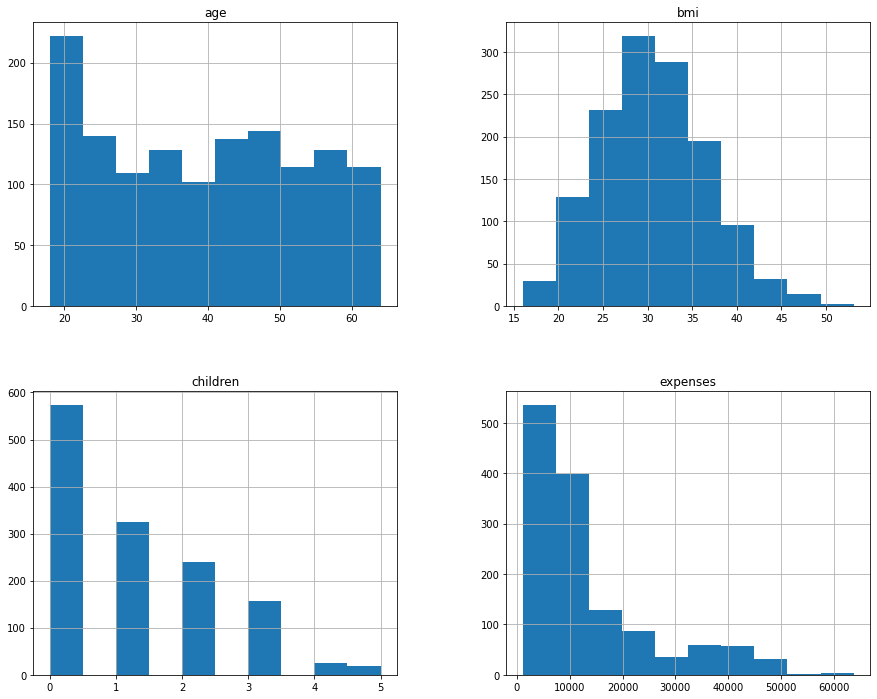

In [13]:
# Distribuição dos dados
dados.hist(figsize = (15, 12));

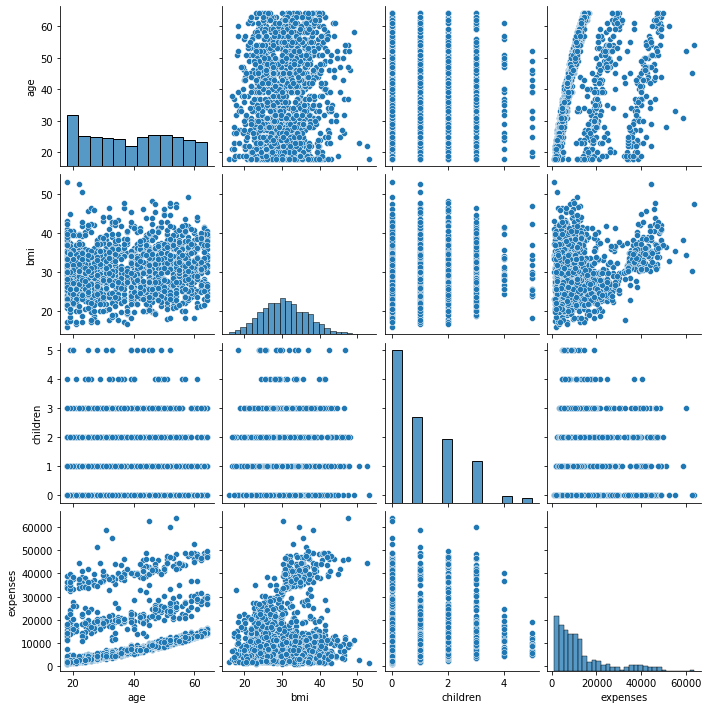

In [14]:
sns.pairplot(dados)

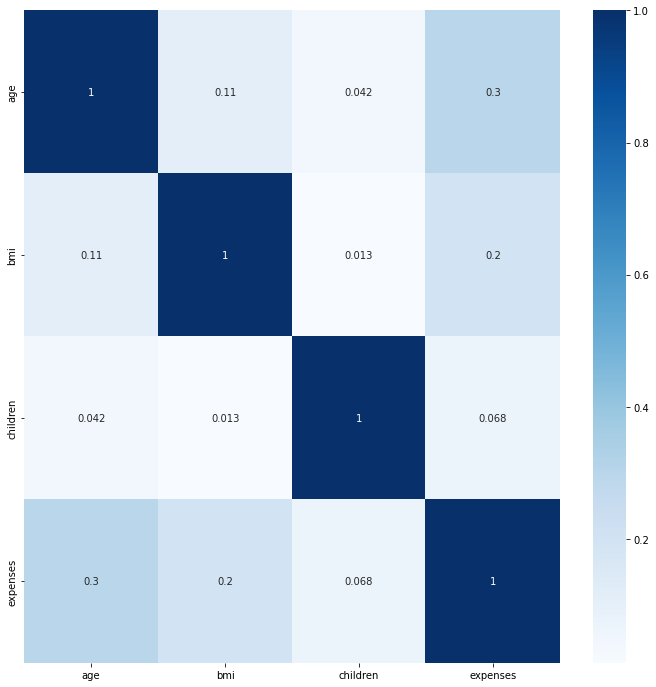

In [15]:
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(dados.corr(), annot = True, cmap = 'Blues', ax = ax);

In [17]:
dados.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

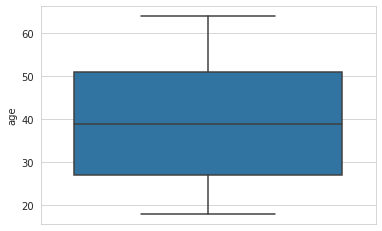

In [18]:
sns.set_style("whitegrid")  
sns.boxplot(y='age', data=dados);

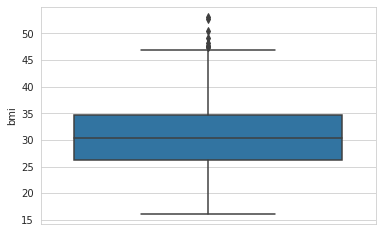

In [20]:
sns.set_style("whitegrid")  
sns.boxplot(y='bmi', data=dados);

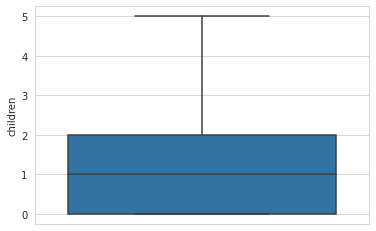

In [21]:
sns.set_style("whitegrid")  
sns.boxplot(y='children', data=dados);

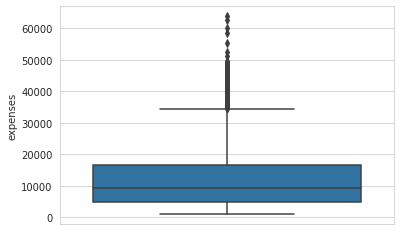

In [22]:
sns.set_style("whitegrid")  
sns.boxplot(y='expenses', data=dados);



## Pré processamento de dados

In [24]:
# Column Transform
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

# Criando X e Y
X = dados.drop('expenses', axis = 1)
y = dados['expenses']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# fit column transform com nosso dado de treino
ct.fit(X_train)

# Normalizando com MinMaxScaler e OneHotEncoder
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [25]:
# verifica o shape dos arrays criados
X_train.shape, y_train.shape,X_test.shape, X_train.shape

((936, 6), (936,), (402, 6), (936, 6))

In [47]:
# construindo a rede neural
tf.random.set_seed(42)

# criando o modelo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# compilando o modelo
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["mae"])

# fit o modelo
model.fit(tf.expand_dims(X_train_ct, axis=-1), y_train, epochs=100, verbose=1)


Epoch 1/100
30/30 [==============================] - 1s 4ms/step - loss: 13378.3359 - mae: 13378.3359
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 13376.2646 - mae: 13376.2646
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 13371.8965 - mae: 13371.8965
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 13363.3525 - mae: 13363.3525
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 13348.5664 - mae: 13348.5664
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 13325.3896 - mae: 13325.3896
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 13291.7178 - mae: 13291.7178
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 13245.6523 - mae: 13245.6523
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 13185.2969 - mae: 13185.2969
Epoch 10/100
30/30 [==============================] - 0s 4ms/step - loss: 13108.78

In [48]:
# Check the results of the insurance model on the test data
model.evaluate(X_test_ct, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8284.7324 - mae: 8284.7324


[8284.732421875, 8284.732421875]

In [49]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 11, 100)           200       
                                                                 
 dense_34 (Dense)            (None, 11, 10)            1010      
                                                                 
 dense_35 (Dense)            (None, 11, 1)             11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
